In [4]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
# Para realizar cálculos numéricos y operaciones vectoriales
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
# Necesario para graficar superficies 3D
from mpl_toolkits.mplot3d import Axes3D

# Muestra las gráficas dentro del cuaderno
%matplotlib inline

In [5]:
# importando pandas para el analisis de datos
import pandas as pd
# se utiliza para codificar variables categóricas en variables numéricas
from sklearn.preprocessing import LabelEncoder

#from datetime import datetime

In [6]:
#Carga de dataset
data = pd.read_csv('Shoe prices.csv')

In [7]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [8]:
print(data)

            Brand              Model        Type Gender    Size      Color  \
0            Nike       Air Jordan 1  Basketball    Men   US 10  Red/Black   
1          Adidas     Ultra Boost 21     Running    Men  US 9.5      Black   
2          Reebok    Classic Leather      Casual    Men   US 11      White   
3        Converse       Chuck Taylor      Casual  Women    US 8       Navy   
4            Puma       Future Rider   Lifestyle  Women  US 7.5       Pink   
...           ...                ...         ...    ...     ...        ...   
1001  New Balance  Fresh Foam 880v11     Running  Women   US 10       Grey   
1002        Asics    Gel-Kayano Lite     Running    Men  US 9.5      Black   
1003         Fila           Venom 94     Fashion  Women  US 7.5      White   
1004     Skechers            Summits    Training    Men    US 8       Grey   
1005         Nike         Air Max 97     Running  Women  US 7.5     Silver   

       Material Price (USD)  
0       Leather    $170.00   
1  

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [10]:
columnas_eliminar = ['Price (USD)']
simbolo = '$'

# solo se pone en bucle una vez ya que hay un solo dato en la lista.
for columna in columnas_eliminar:
    # str.replace es metodo de pandas
    # se asegura que el símbolo "$" se trate como una cadena literal en lugar de una expresión regular
    data[columna] = data[columna].str.replace(simbolo, '', regex=False)

In [11]:
print(data)

            Brand              Model        Type Gender    Size      Color  \
0            Nike       Air Jordan 1  Basketball    Men   US 10  Red/Black   
1          Adidas     Ultra Boost 21     Running    Men  US 9.5      Black   
2          Reebok    Classic Leather      Casual    Men   US 11      White   
3        Converse       Chuck Taylor      Casual  Women    US 8       Navy   
4            Puma       Future Rider   Lifestyle  Women  US 7.5       Pink   
...           ...                ...         ...    ...     ...        ...   
1001  New Balance  Fresh Foam 880v11     Running  Women   US 10       Grey   
1002        Asics    Gel-Kayano Lite     Running    Men  US 9.5      Black   
1003         Fila           Venom 94     Fashion  Women  US 7.5      White   
1004     Skechers            Summits    Training    Men    US 8       Grey   
1005         Nike         Air Max 97     Running  Women  US 7.5     Silver   

       Material Price (USD)  
0       Leather     170.00   
1  

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        1006 non-null   object
 1   Model        1006 non-null   object
 2   Type         1006 non-null   object
 3   Gender       1006 non-null   object
 4   Size         1006 non-null   object
 5   Color        1006 non-null   object
 6   Material     1006 non-null   object
 7   Price (USD)  1006 non-null   object
dtypes: object(8)
memory usage: 63.0+ KB


In [13]:
# Supongamos que 'data' es tu DataFrame
columna_categorica = 'Price (USD)'
columna_numerica = 'Price'

# Crea una nueva columna numérica y copia los valores de la columna categórica
# to_numeric se utiliza para cambiar de categoricas a numericas
# El parámetro errors='coerce' indica que si hay valores no numéricos se establescan como NaN en la nueva columna.
data[columna_numerica] = pd.to_numeric(data[columna_categorica], errors='coerce')

# Elimina la columna categórica original
# axis indica que solo se eliminara una columna
# inplace indica que se debe modificar directamente en el data
data.drop(columna_categorica, axis=1, inplace=True)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     1006 non-null   object 
 1   Model     1006 non-null   object 
 2   Type      1006 non-null   object 
 3   Gender    1006 non-null   object 
 4   Size      1006 non-null   object 
 5   Color     1006 non-null   object 
 6   Material  1006 non-null   object 
 7   Price     1006 non-null   float64
dtypes: float64(1), object(7)
memory usage: 63.0+ KB


In [15]:
#variables categoricas
# con select_dtypes seleccionamos las columnas de data de tipo object
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [16]:
print(columnas_categoricas)

Index(['Brand', 'Model', 'Type', 'Gender', 'Size', 'Color', 'Material'], dtype='object')


In [17]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  # se crea una instancia (se utiliza para convetir categoricos a numericos)
  le = LabelEncoder()
  # cambia de categoricos a numericos unico
  data[columna] = le.fit_transform(data[columna])

In [18]:
#resultado
print(data)

      Brand  Model  Type  Gender  Size  Color  Material  Price
0         5     17     0       0     0     61        10  170.0
1         0    212    10       0    12      1        20  180.0
2         7     49     1       0     2     67        10   75.0
3         2     48     1       1     9     52         0   55.0
4         6    105     7       1     8     56        14   80.0
...     ...    ...   ...     ...   ...    ...       ...    ...
1001      4     89    10       1     0     39        14  130.0
1002      1    123    10       0    12      1        14  160.0
1003      3    225     5       1     8     67        10   70.0
1004      8    202    15       0     9     39        14   55.0
1005      5     22    10       1     8     63        10  170.0

[1006 rows x 8 columns]


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     1006 non-null   int32  
 1   Model     1006 non-null   int32  
 2   Type      1006 non-null   int32  
 3   Gender    1006 non-null   int32  
 4   Size      1006 non-null   int32  
 5   Color     1006 non-null   int32  
 6   Material  1006 non-null   int32  
 7   Price     1006 non-null   float64
dtypes: float64(1), int32(7)
memory usage: 35.5 KB


In [20]:
# Lectura de Datos
# iloc accede a los datos
# x me muestra las primeras 12 columnas
X = data.iloc[:, :7]
# y me muestra la ultima columna
y = data.iloc[:, 7]
m = y.size

In [21]:
print(X)
print('*'*20)
print(y)
print('*'*20)
print(m)

      Brand  Model  Type  Gender  Size  Color  Material
0         5     17     0       0     0     61        10
1         0    212    10       0    12      1        20
2         7     49     1       0     2     67        10
3         2     48     1       1     9     52         0
4         6    105     7       1     8     56        14
...     ...    ...   ...     ...   ...    ...       ...
1001      4     89    10       1     0     39        14
1002      1    123    10       0    12      1        14
1003      3    225     5       1     8     67        10
1004      8    202    15       0     9     39        14
1005      5     22    10       1     8     63        10

[1006 rows x 7 columns]
********************
0       170.0
1       180.0
2        75.0
3        55.0
4        80.0
        ...  
1001    130.0
1002    160.0
1003     70.0
1004     55.0
1005    170.0
Name: Price, Length: 1006, dtype: float64
********************
1006


In [22]:
def  featureNormalize(X):
    # Se crea una copia del conjunto de datos X para evitar modificar los datos originales.
    X_norm = X.copy()
    # se crea un arreglo de 0 para almacenar la media y desviacion estandar
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # media
    mu = np.mean(X, axis = 0)
    # desviacion estandar
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [23]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('*'*20)
print('Media calculada:', mu)
print('*'*20)
print('Desviación estandar calculada:', sigma)
print('*'*20)
print(X_norm)

      Brand  Model  Type  Gender  Size  Color  Material
0         5     17     0       0     0     61        10
1         0    212    10       0    12      1        20
2         7     49     1       0     2     67        10
3         2     48     1       1     9     52         0
4         6    105     7       1     8     56        14
...     ...    ...   ...     ...   ...    ...       ...
1001      4     89    10       1     0     39        14
1002      1    123    10       0    12      1        14
1003      3    225     5       1     8     67        10
1004      8    202    15       0     9     39        14
1005      5     22    10       1     8     63        10

[1006 rows x 7 columns]
********************
Media calculada: Brand         4.472167
Model       118.103380
Type          7.154076
Gender        0.468191
Size          7.089463
Color        35.570577
Material     13.236581
dtype: float64
********************
Desviación estandar calculada: Brand        2.840477
Model       68.

In [24]:
# Añade el termino de interseccion a X
# (Columna de unos para X0)
# np.ones(m, numero de columnas)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [25]:
print(X)

[[ 1.          0.18582547 -1.47997379 ... -1.76568972  0.95777443
  -0.4176412 ]
 [ 1.         -1.57444213  1.37447964 ...  1.22300998 -1.30206705
   0.87273671]
 [ 1.          0.8899325  -1.01155066 ... -1.2675731   1.18375858
  -0.4176412 ]
 ...
 [ 1.         -0.51828157  1.56477653 ...  0.22677675  1.18375858
  -0.4176412 ]
 [ 1.          1.24198602  1.22809741 ...  0.47583506  0.12916589
   0.09850996]
 [ 1.          0.18582547 -1.40678267 ...  0.22677675  1.03310248
  -0.4176412 ]]


In [26]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    # shape == devuelve el tamaño de la primera dimensión del arreglo
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # valor del costo
    J = 0

    # Se calcula la hipótesis
    h = np.dot(X, theta)

    # square == elevado
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J

In [27]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [28]:
fila_deseada = 12

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].tolist()
  print(fila_completa)
else:
  print("La fila no existe")

[7.0, 52.0, 1.0, 1.0, 10.0, 56.0, 10.0, 70.0]


theta calculado por el descenso por el gradiente: [100.62525321 -19.29058861   1.04959692   9.43122623  -2.8321328
  -1.76128588  -4.28343126   6.10921047]
El valor predecido es (usando el descenso por el gradiente): 60.1957


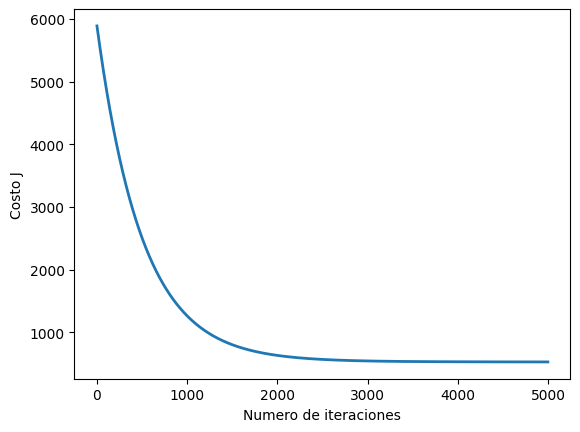

In [29]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 5000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(8)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# Estimar el precio para un smart watch con distintas caracteristicas
X_array = [1, 7.0, 52.0, 1.0, 1.0, 10.0, 56.0, 10.0]
X_array[1:8] = (X_array[1:8] - mu) / sigma
price = np.dot(X_array, theta)   # Se debe cambiar esto

print('El valor predecido es (usando el descenso por el gradiente): {:.4f}'.format(price))

In [31]:
# Lectura de Datos
# iloc accede a los datos
# x me muestra las primeras 12 columnas
X = data.iloc[:, :7]
# y me muestra la ultima columna
y = data.iloc[:, 7]
m = y.size

In [32]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [33]:
# importante que para usar m>n, evitar datos redundantes, no se normaliza
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

    return theta

In [34]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y);

# Muestra los resultados optenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)));

# Estimar el número total de fumadores con distintas caracteristicas

X_array = [1, 7.0, 52.0, 1.0, 1.0, 10.0, 56.0, 10.0]
price = np.dot(X_array, theta)

print('Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): ${:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.17753000e+02 -7.05054616e+00  1.04922618e-02  2.15092114e+00
 -6.30149830e+00 -4.27853096e-01 -1.53054946e-01  7.46805022e-01]
Precio predecido para una cada de superficie de 1650 sq-ft y 3 dormitorios (usando la ecuación de la normal): $59
